In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

k = 1 Accuracy:  0.9555555555555556
k = 2 Accuracy:  0.9111111111111111
k = 3 Accuracy:  0.9555555555555556
k = 4 Accuracy:  0.8888888888888888
k = 5 Accuracy:  0.9111111111111111
k = 6 Accuracy:  0.9111111111111111
k = 7 Accuracy:  0.9555555555555556
k = 8 Accuracy:  0.9333333333333333
k = 9 Accuracy:  0.9555555555555556
k = 10 Accuracy:  0.9333333333333333


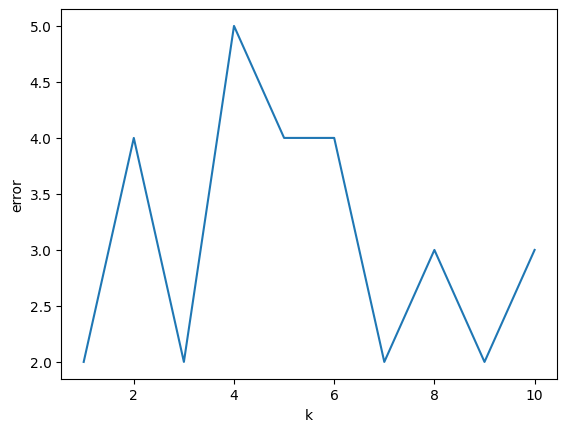

In [32]:
#1

iris = datasets.load_iris()

X = iris.data
y = iris.target
 
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
 
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            #dst = distance.euclidean(self.X_train[0], x)
            dst = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            knn = np.argsort(dst)[:self.k]
            knn_labels = self.y_train[knn]
            labels, counts = np.unique(knn_labels, return_counts=True)
            predictions.append(labels[np.argmax(counts)])
        return predictions

error = []
for k in range(1, 11):
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('k =', k, 'Accuracy: ', accuracy)

    error.append(len(y_test) - accuracy_score(y_test, y_pred, normalize=False))

plt.plot(range(1, 11), error)
plt.xlabel('k')
plt.ylabel('error')
plt.show()

In [61]:
#2

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 11, 1)
for k in neighbors:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    y_train_pred = neigh.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)

    # plt.figure()
    # plt.plot(y_train, y_train_pred, 'o')
    # plt.plot(y_test, y_pred, 'x')
    # plt.show()
    print('k =', k, 'Accuracy: ', accuracy)

k = 1 Accuracy:  0.9555555555555556
k = 2 Accuracy:  0.9111111111111111
k = 3 Accuracy:  0.9555555555555556
k = 4 Accuracy:  0.8888888888888888
k = 5 Accuracy:  0.9111111111111111
k = 6 Accuracy:  0.9111111111111111
k = 7 Accuracy:  0.9555555555555556
k = 8 Accuracy:  0.9333333333333333
k = 9 Accuracy:  0.9555555555555556
k = 10 Accuracy:  0.9333333333333333


In [60]:
#3 EXAMPLE

from sklearn import tree
from six import StringIO 
import pydot 

clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
print(clf.predict(iris.data[:1, :]))
print(clf.predict_proba(iris.data[:1, :]))

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
#graph[0].write("iris.pdf")

[0]
[[1. 0. 0.]]


In [73]:
#3 EXERCISE

from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist


ModuleNotFoundError: No module named 'tensorflow'